In [5]:
import schemdraw
import schemdraw.elements as elm
import schemdraw.logic as logic
import schemdraw.elements.intcircuits 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from schemdraw.parsing import logicparse

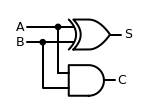

In [6]:
with schemdraw.Drawing() as d:
    d.config(unit=0.5)
    d += (S := logic.Xor().label('S', 'right'))
    d += logic.Line().left(d.unit*2).at(S.in1).idot().label('A', 'left')
    d += (B := logic.Line().left().at(S.in2).dot())
    d += logic.Line().left().label('B', 'left')
    d += logic.Line().down(d.unit*3).at(S.in1)
    d += (C := logic.And().right().anchor('in1').label('C', 'right'))
    d += logic.Wire('|-').at(B.end).to(C.in2)

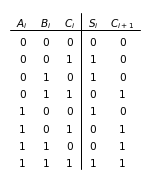

In [8]:
table = '''
 $A_i$ | $B_i$ | $C_i$|$S_i$|$C_{i+1}$|
---|---|---|---|---|
 0 | 0 | 0 | 0 | 0
 0 | 0 | 1 | 1 | 0
 0 | 1 | 0 | 1 | 0
 0 | 1 | 1 | 0 | 1
 1 | 0 | 0 | 1 | 0
 1 | 0 | 1 | 0 | 1
 1 | 1 | 0 | 0 | 1
 1 | 1 | 1 | 1 | 1
'''
schemdraw.logic.Table(table, colfmt='ccc|cc')

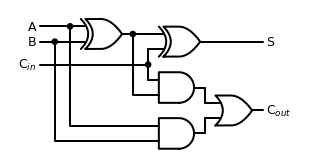

In [9]:
with schemdraw.Drawing() as d:
    d.config(unit=0.5)
    d += (X1 := logic.Xor())
    d += (A := logic.Line().left(d.unit*2).at(X1.in1).idot().label('A', 'left'))
    d += (B := logic.Line().left().at(X1.in2).dot())
    d += logic.Line().left().label('B', 'left')

    d += logic.Line().right().at(X1.out).idot()
    d += (X2 := logic.Xor().anchor('in1'))
    d += (C := logic.Line().down(d.unit*2).at(X2.in2))
    d.push()
    d += logic.Dot().at(C.center)
    d += logic.Line().tox(A.end).label('C$_{in}$', 'left')
    d.pop()

    d += (A1 := logic.And().right().anchor('in1'))
    d += logic.Wire('-|').at(A1.in2).to(X1.out)
    d.move_from(A1.in2, dy=-d.unit*2)
    d += (A2 := logic.And().right().anchor('in1'))
    d += logic.Wire('-|').at(A2.in1).to(A.start)
    d += logic.Wire('-|').at(A2.in2).to(B.end)
    d.move_from(A1.out, dy=-(A1.out.y-A2.out.y)/2)
    d += (O1 := logic.Or().right().label('C$_{out}$', 'right'))
    d += logic.Line().at(A1.out).toy(O1.in1)
    d += logic.Line().at(A2.out).toy(O1.in2)
    d += logic.Line().at(X2.out).tox(O1.out).label('S', 'right')

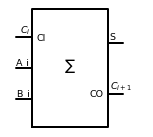

In [20]:
full_add = elm.Ic(
    pins=[
        elm.IcPin(pin='B_i', side='left'),
        elm.IcPin(pin='A_i', side='left'),
        elm.IcPin(name = 'CI',pin='$C_i$', side='left'),
        elm.IcPin(name = 'CO',pin='$C_{i+1}$', side='right', anchorname='QBAR'),
        elm.IcPin(pin='S', side='right')
        ],
        edgepadW = .5,  # Make it a bit wider
        pinspacing=1
        ).label('$\sum$', fontsize=12)
display(full_add)

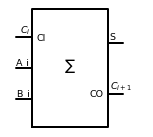

AttributeError: CO not defined in Element

In [53]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    full_add = elm.Ic(
    pins=[
        elm.IcPin(pin='B_i', side='left'),
        elm.IcPin(pin='A_i', side='left'),
        elm.IcPin(name='CI',pin='$C_i$', side='left'),
        elm.IcPin(name='CO',pin='$C_{i+1}$', side='right', anchorname='QBAR'),
        elm.IcPin(pin='S', side='right')
        ],
        edgepadW = .5,  # Make it a bit wider
        pinspacing=1
        ).label('$\sum$', fontsize=12)

    d += (A:=full_add)
    d.move_from(A.CO,5,5)
    d += (B:=full_add)